In [13]:
import os
from pathlib import Path

import pandas as pd
from dotenv import load_dotenv
from typing import Any

from simulator.simulator import OptionSimulator
from strategies.option_selling import OptionSellingStrategy
from simulator.chain import  OptionChainTimeline

import matplotlib.pyplot as plt
import seaborn as sns


## Load data

In [14]:
base_path = Path("data/")
eth_df_location = base_path/ "eth_1h_deribit_all.parquet"

eth_df = pd.read_parquet(eth_df_location)
chain_timeline = OptionChainTimeline(eth_df)

In [23]:
eth_df.head()

,timestamp,symbol,underlying,type,strike,expiration,open_interest,last_price,bid_price,bid_amount,...,mark_iv,underlying_index,underlying_price,delta,gamma,vega,theta,rho,iv_ratio,spot_ratio
0,2021-01-01,ETH-15JAN21-1000-C,ETH,call,1000.0,2021-01-15 08:00:00,504.0,0.0135,0.0110,405.0,...,116.09,SYN.ETH-15JAN21,764.23,0.11825,0.00116,0.29099,-1.17836,0.03091,1.0,1.0
1,2021-01-01,ETH-15JAN21-1040-C,ETH,call,1040.0,2021-01-15 08:00:00,421.0,0.0135,0.0085,405.0,...,118.71,SYN.ETH-15JAN21,764.23,0.09354,0.00096,0.24561,-1.01709,0.02452,1.0,1.0
2,2021-01-01,ETH-15JAN21-1080-C,ETH,call,1080.0,2021-01-15 08:00:00,889.0,0.0100,0.0065,400.0,...,121.33,SYN.ETH-15JAN21,764.23,0.07472,0.00079,0.20753,-0.87832,0.01963,1.0,1.0
3,2021-01-01,ETH-15JAN21-460-P,ETH,put,460.0,2021-01-15 08:00:00,2048.0,0.0015,0.0010,400.0,...,121.51,SYN.ETH-15JAN21,764.23,-0.01762,0.00024,0.06392,-0.27093,-0.00562,1.0,1.0
4,2021-01-01,ETH-15JAN21-480-P,ETH,put,480.0,2021-01-15 08:00:00,1696.0,0.0020,0.0015,400.0,...,112.95,SYN.ETH-15JAN21,764.23,-0.01983,0.00029,0.07066,-0.27840,-0.00629,1.0,1.0


## Define simulation

In [15]:
strategy = OptionSellingStrategy(
    trade_interval = "30d",
    time_to_maturity = "30d",
    collateralization_ratio = 1.0,
    utilization_ratio = 1.0,
    option_type = "call",
    mode = "moneyness",
    target = -0.1,
    liquidity_delta =1.0,
)

simulator = OptionSimulator(
    chain_timeline = chain_timeline,
    strategies = [strategy],
)

result = simulator.simulate("2021-01-01", "2022-06-10", starting_capital=1000000, time_step="1d")

math domain error
math domain error
math domain error
math domain error
math domain error
math domain error


In [16]:
result.action_log_table.head()

,timestamp,step,spot,type,position_type,position_strike,position_maturity,position_size,position_collateral_primary,position_collateral_secondary,position_iv_start,position_price_start,liquidity_change
0,2021-01-01,0,764.23,sell,call,849.144444,2021-01-31,-1308.506601,0,1308.506601,0.971108,53.095764,-9.305238e+05
1,2021-01-31,30,1460.73,expiration,call,849.144444,2021-01-31,-1308.506601,0,1308.506601,0.971108,53.095764,1.111111e+06
2,2021-01-31,30,1460.73,sell,call,1623.033333,2021-03-02,-851.564692,0,851.564692,1.332257,161.007654,-1.106798e+06
3,2021-03-02,60,1571.60,expiration,call,1623.033333,2021-03-02,-851.564692,0,851.564692,1.332257,161.007654,1.338319e+06
4,2021-03-02,60,1571.60,sell,call,1746.222222,2021-04-01,-945.427646,0,945.427646,1.256398,159.663869,-1.334883e+06


In [17]:
result.metrics

{'Sharpe': 0.8815979007557863,
 'Sortino': 1.281555275164291,
 'CAGR': 0.4722408929598725,
 'MDD': -0.5178257168656006,
 'Calmar': 0.911238761694643}

In [18]:
result.benchmark_metrics

{'Sharpe': 1.1028129646846179,
 'Sortino': 1.691816437378846,
 'CAGR': 0.8088417338871043,
 'MDD': -0.633155237589946,
 'Calmar': 1.2763537737144481}

In [19]:
result.timeline.head()

,timestamp,spot,primary,secondary,liquidity,num_long_positions,num_short_positions,size_long_positions,size_short_positions,collateral_primary,collateral_secondary,total_collaterals,positions_delta,total_delta,positions_value,total_value
0,2021-01-01,764.23,0.0,90.910012,69476.158335,0,1,0,1308.506601,0,1308.506601,1000000.0,-534.55562,864.860993,-71177.282088,998298.876248
1,2021-01-02,771.2,0.0,90.910012,70109.801118,0,1,0,1308.506601,0,1308.506601,1009120.291012,-514.979874,884.436739,-60276.349342,1018953.742788
2,2021-01-03,776.87,0.0,90.910012,70625.260885,0,1,0,1308.506601,0,1308.506601,1016539.523442,-585.794557,813.622056,-89187.64466,997977.139667
3,2021-01-04,978.91,0.0,90.910012,88992.719674,0,1,0,1308.506601,0,1308.506601,1280910.197192,-938.028301,461.388312,-269810.121342,1100092.795524
4,2021-01-05,1042.2,0.0,90.910012,94746.414322,0,1,0,1308.506601,0,1308.506601,1363725.579996,-992.489883,406.92673,-353358.839118,1105113.1552


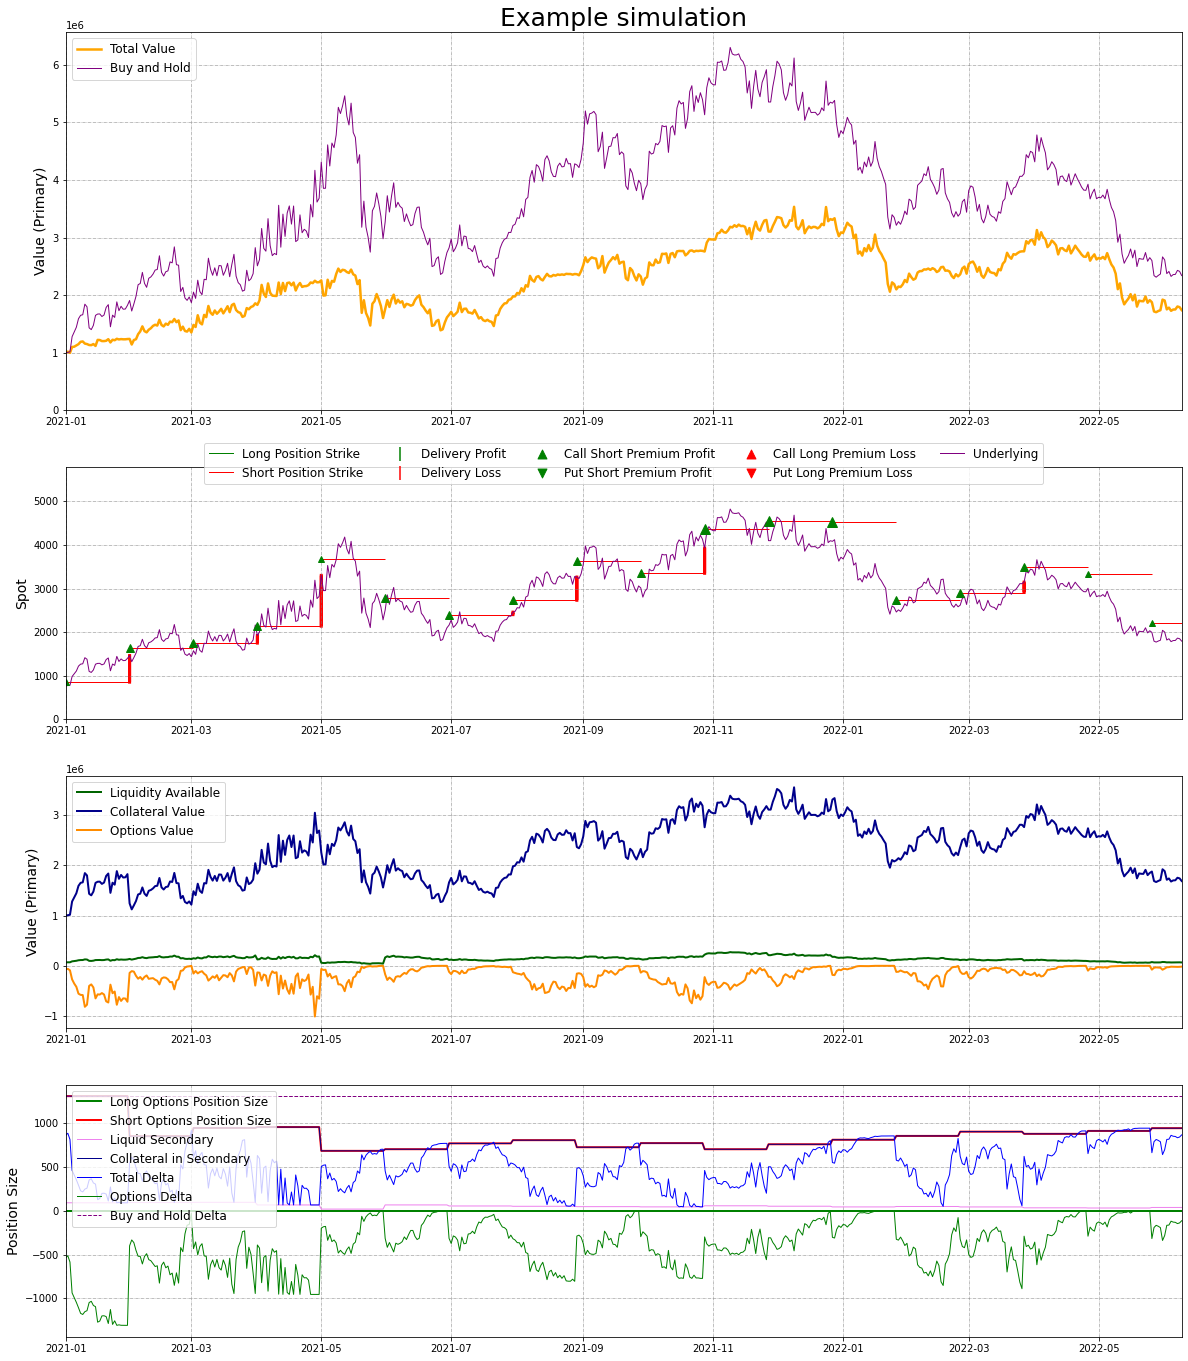

In [20]:
result.plot_simulation("Example simulation")